In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from multi_tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

In [4]:
dataset = pd.read_csv("csv/Concrete_Data_Yeh.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
tester = tester(X, y, generator, 10, 4, 800, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.5644310009568196 Generation best 0.5429488564461866
Split:  1 Feature:  1


KeyboardInterrupt: 

In [ ]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

8
8
7
8
8
8
8
8
8
8


In [ ]:
tester.test_models(notests=20)

Iteration 4 - MSE 25.210106658508685, R2 0.9057595690079335, MAE 3.7697119464875155, NEW_MSE 26.93233813727552, NEW_R2 0.8993215225916439, NEW_MAE 3.8148650675825815
Iteration 9 - MSE 25.67254776465339, R2 0.9040308714763499, MAE 3.780773741361194, NEW_MSE 26.95820071947482, NEW_R2 0.8992248430763192, NEW_MAE 3.798051295151888
Iteration 14 - MSE 25.128939584218934, R2 0.9060629877981452, MAE 3.748372306284819, NEW_MSE 26.478870741432054, NEW_R2 0.9010166745957198, NEW_MAE 3.803948000912087
Iteration 19 - MSE 25.274693839073688, R2 0.9055181291832054, MAE 3.765635333007608, NEW_MSE 27.165391371910374, NEW_R2 0.8984503228948877, NEW_MAE 3.762256583540694
Iteration 4 - MSE 23.871183390098683, R2 0.9107647325159458, MAE 3.5543980417614756, NEW_MSE 24.620816011968213, NEW_R2 0.9079624555431567, NEW_MAE 3.4868458042510766
Iteration 9 - MSE 25.71385780997002, R2 0.9038764462481002, MAE 3.783395657400964, NEW_MSE 23.398548515140313, NEW_R2 0.912531536398266, NEW_MAE 3.251273317938491
Iteration

In [ ]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,25.500555,0.904674,3.768361,26.874712,0.899537,3.803139
1,MLPRegressor,25.176754,0.905884,3.680257,26.050676,0.902617,3.516970
2,SGDRegressor,100.015191,0.626123,7.819496,46.784407,0.825111,5.460619
3,GradientBoostingRegressor,39.716203,0.851533,3.942300,33.818005,0.873582,3.812875


In [ ]:
tester.get_individual_tests()

{'RandomForestRegressor':           MSE        R2       MAE    NEW_MSE    NEW_R2   NEW_MAE
 0   25.022953  0.906459  3.733320  27.093649  0.898719  3.834408
 1   25.496336  0.904690  3.810012  27.899640  0.895706  3.881790
 2   26.096516  0.902446  3.773388  26.524020  0.900848  3.789920
 3   25.761207  0.903699  3.797519  26.508069  0.900908  3.772404
 4   25.210107  0.905760  3.769712  26.932338  0.899322  3.814865
 5   25.480123  0.904750  3.732137  27.016284  0.899008  3.824336
 6   25.982758  0.902871  3.809462  26.810305  0.899778  3.795662
 7   25.663435  0.904065  3.777347  27.104650  0.898677  3.800475
 8   25.552019  0.904481  3.776031  25.849460  0.903370  3.702381
 9   25.672548  0.904031  3.780774  26.958201  0.899225  3.798051
 10  25.977812  0.902890  3.790060  27.333407  0.897822  3.828747
 11  25.935959  0.903046  3.798053  26.196578  0.902072  3.760013
 12  24.822155  0.907210  3.713101  27.729269  0.896342  3.899344
 13  25.049662  0.906359  3.712895  26.697536  0.90

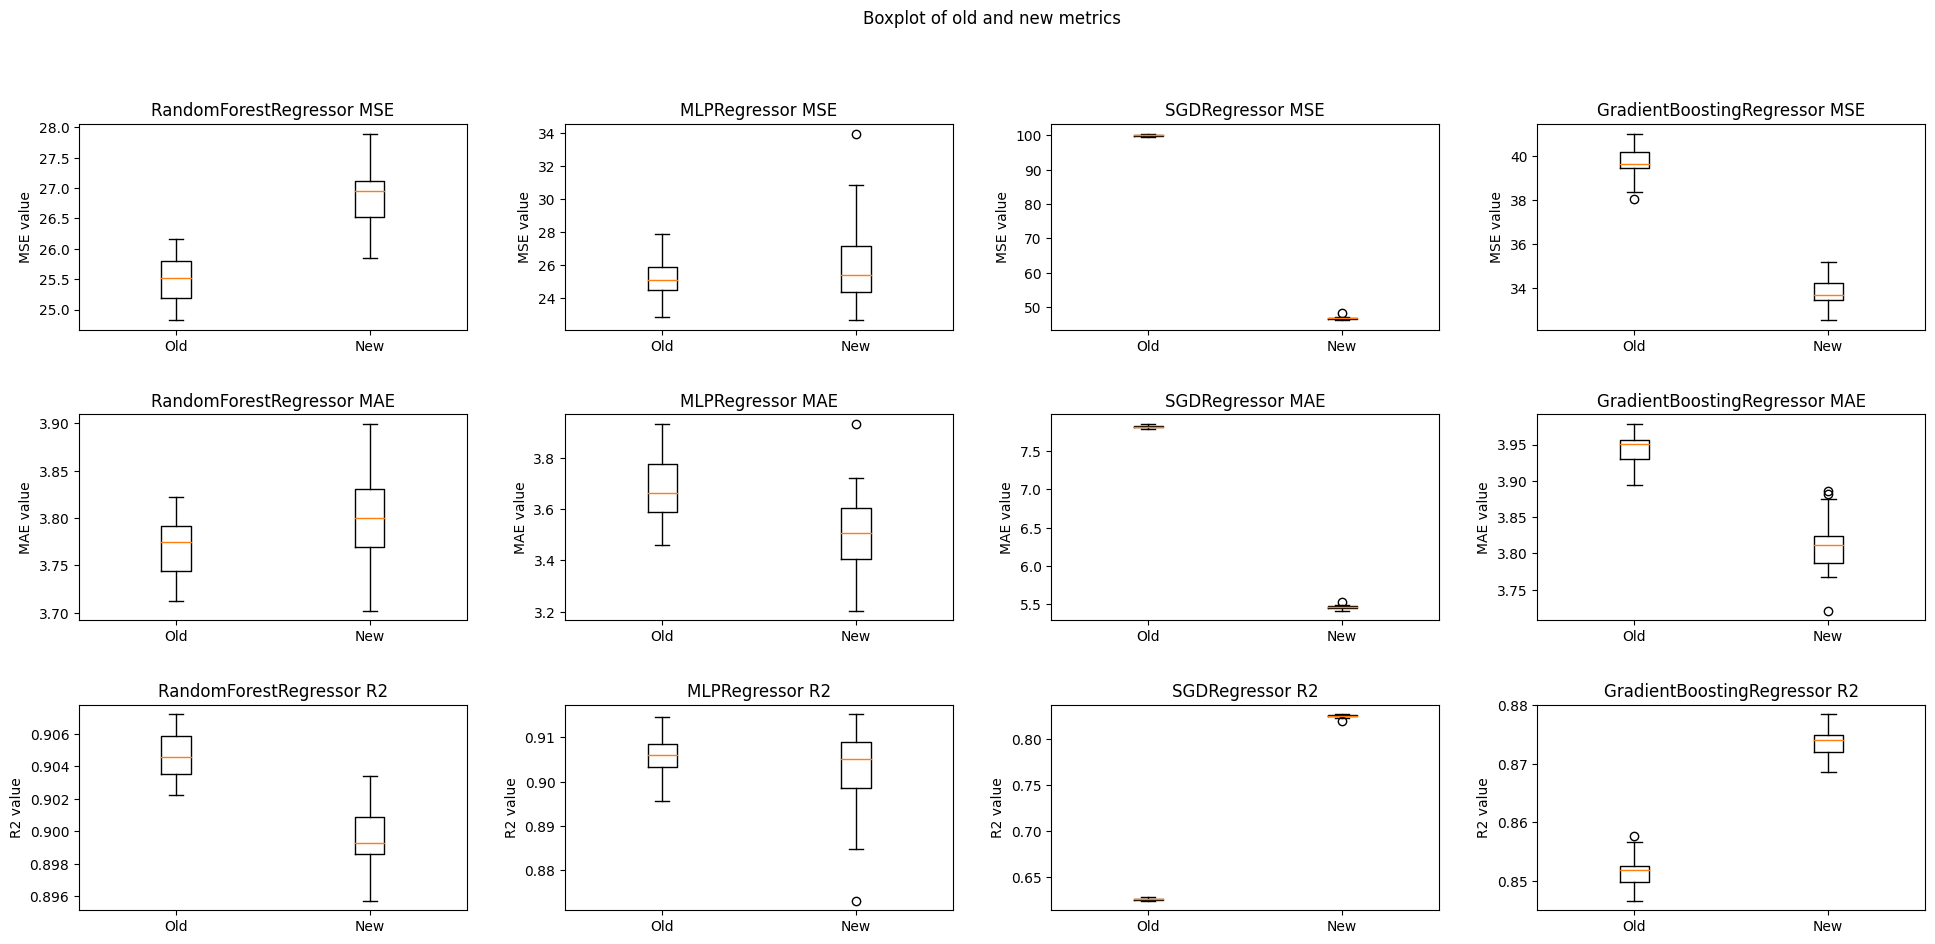

In [ ]:
tests = tester.get_individual_tests()

from makeplots import make_boxplots

make_boxplots(tests, "insurance")

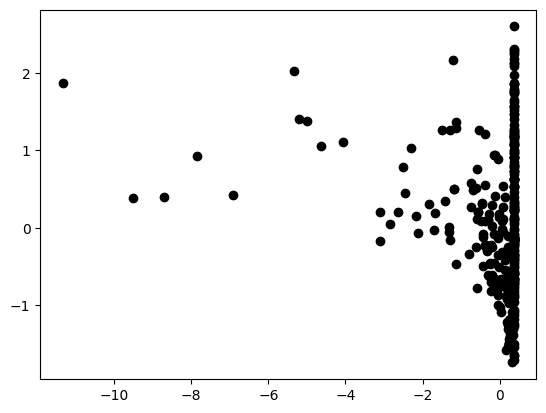

Min:  -11.3293225400175 Max:  0.3607744850287626 Mean:  -0.2000059556107077 Std:  1.4291342105063538


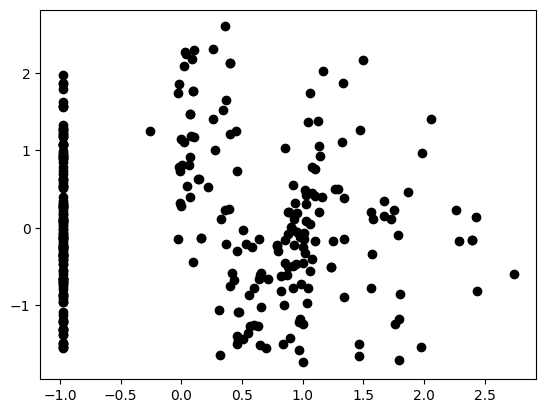

Min:  -0.9765949473188955 Max:  2.7372061103467074 Mean:  0.05482554498953397 Std:  1.0113694606691763


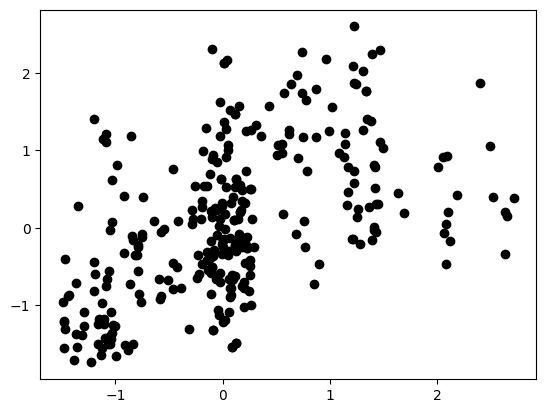

Min:  -1.489928413642171 Max:  2.715667010314604 Mean:  0.10474932356629649 Std:  0.9193147790217


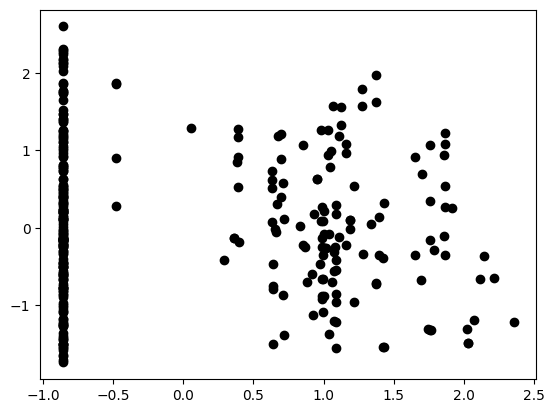

Min:  -0.8585819030161296 Max:  2.3546017268467567 Mean:  -0.012436039819502212 Std:  1.029785854255414


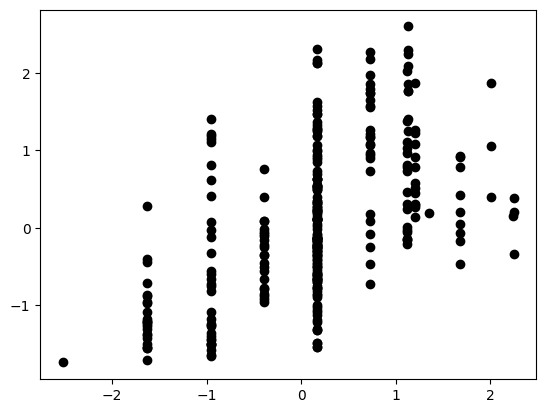

Min:  -2.52103756796472 Max:  2.2469113158673153 Mean:  0.12330777355558291 Std:  0.8621757486230286


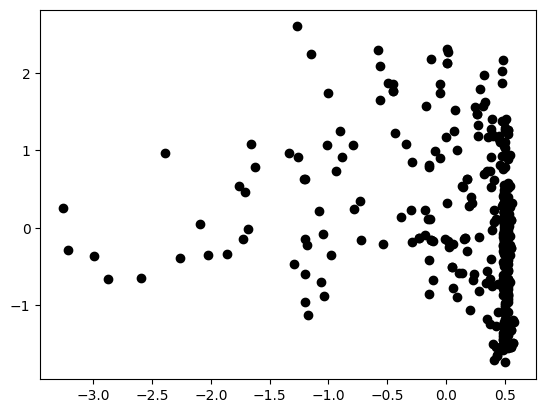

Min:  -3.2598508053436324 Max:  0.5759966491414439 Mean:  0.08872561376437373 Std:  0.7275534445002977


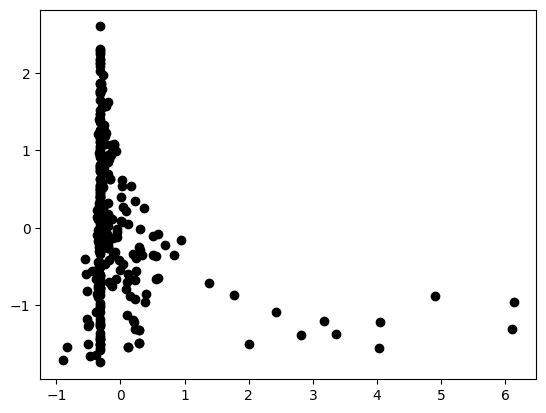

Min:  -0.8993253926826285 Max:  6.1289388043896675 Mean:  -0.0623693722196352 Std:  0.8131216205813847


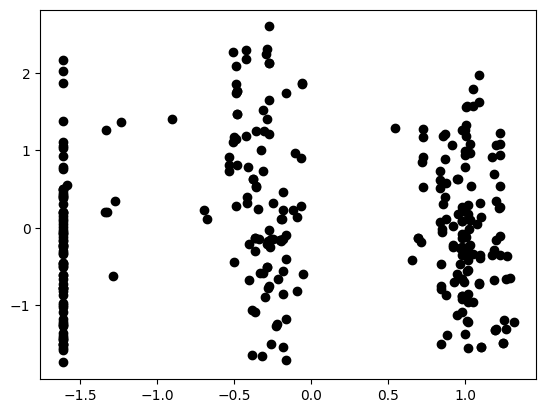

Min:  -1.6136056730511605 Max:  1.3158204810551068 Mean:  -0.09882987818009623 Std:  1.067252440988658


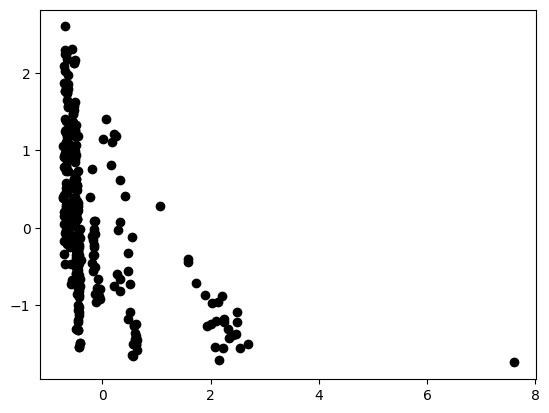

Min:  -0.7332174435401851 Max:  7.603618773519258 Mean:  -0.17467688050851315 Std:  0.8776040854598224


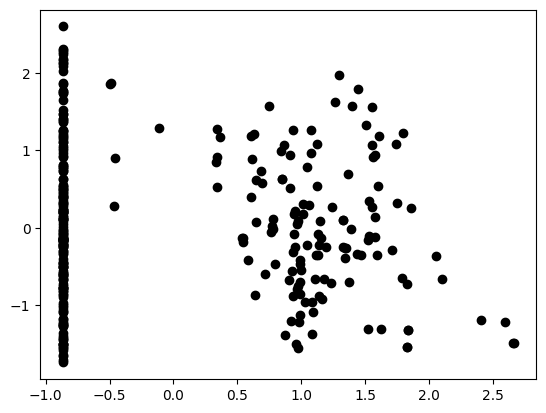

Min:  -0.8657041091293566 Max:  2.6618276806019256 Mean:  -0.005080997005738034 Std:  1.0466148165589488


In [ ]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())